In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.io.sql as pd_sql
import sqlite3 as sql

%matplotlib inline

In [3]:
con = sql.connect("mooc.db") 

In [4]:
FEATURES = [
    'studentid',
    'clicks',
    'plays',
    'pauses',
    'seeks',
    'loads',
    'transcript',
    'max video',
    'module'
]

In [7]:
df = pd.read_csv("ml.csv", sep=',', header=None, names=FEATURES)

In [8]:
LABEL_MAP = {
    0: 'Overview',
    1: 'Week 1',
    2: 'Week 2',
    3: 'Week 3',
    4: 'Week 4',
    5: 'Week 5',
    6: 'Week 6',
    7: 'Week 7',
    8: 'Week 8',
}   

In [9]:
for k,v in LABEL_MAP.items():
    df.ix[df.module == k, 'module'] = v

In [10]:
df.head()

,studentid,clicks,plays,pauses,seeks,loads,transcript,max video,module
0,126,37,5,NaN,4,11,11,33,Week 4
1,644,599,155,103,3,137,93,88,Week 8
2,647,640,196,19,2,144,149,85,Week 8
3,648,162,32,28,4,39,45,28,Week 4
4,651,294,69,23,2,83,86,80,Week 8


In [11]:
df.describe()

,studentid,clicks,plays,pauses,seeks,loads,transcript,max video
count,7241.000000,7241.000000,5496.000000,5182.000000,1405.000000,7153.000000,6579.000000,7241.000000
mean,3823.911614,216.028173,73.735808,55.423003,8.444128,48.633301,46.146375,32.718409
std,2216.635832,428.697923,173.554488,119.017611,15.317273,85.033568,83.488052,33.454869
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1898.000000,10.000000,4.000000,3.000000,2.000000,3.000000,3.000000,6.000000
50%,3824.000000,41.000000,16.000000,12.000000,3.000000,11.000000,10.000000,14.000000
75%,5741.000000,219.000000,79.000000,61.750000,8.000000,54.000000,47.000000,68.000000
max,7674.000000,9144.000000,4164.000000,2279.000000,205.000000,877.000000,902.000000,88.000000


In [12]:
print "{} instances with {} features\n".format(*df.shape)

print df.groupby('module')['module'].count()

7241 instances with 9 features

module
Overview     377
Week 1      2402
Week 2       903
Week 3       449
Week 4       551
Week 5       356
Week 6       264
Week 7       358
Week 8      1581
dtype: int64


In [13]:
df = df.drop(['studentid'], axis=1)

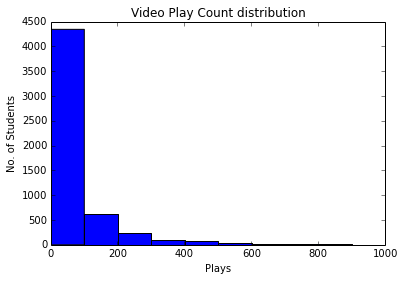

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['plays'], bins = 10, range = (df['plays'].min(),1000))
plt.title('Video Play Count distribution')
plt.xlabel('Plays')
plt.ylabel('No. of Students')
plt.show()

In [37]:
a = df['clicks'].isnull()
a.sum(axis=True)

0

In [38]:
mean_clicks = df['clicks'].mean()

# Use pandas to fill in empty cell with value of mean.
df['clicks'].fillna(value=mean_clicks)

0      37
1     599
2     640
3     162
4     294
5     243
6     417
7      45
8      18
9     226
10    211
11      8
12    155
13    475
14    281
...
7226     766
7227      60
7228     632
7229     874
7230    1041
7231     500
7232     576
7233     124
7234      27
7235     215
7236     499
7237    3838
7238      11
7239      36
7240       9
Name: clicks, Length: 7241, dtype: int64

In [39]:
a = df['plays'].isnull()
a.sum(axis=True)

1745

In [40]:
mean_plays = df['plays'].mean()

# Use pandas to fill in empty cell with value of mean.
df['plays'].fillna(value=mean_plays)

0       5
1     155
2     196
3      32
4      69
5      70
6      51
7      16
8       3
9      51
10     37
11      2
12      6
13    121
14    104
...
7226     165
7227      12
7228     136
7229      25
7230     223
7231     145
7232     127
7233      42
7234       9
7235      30
7236     124
7237    1580
7238       2
7239       8
7240       2
Name: plays, Length: 7241, dtype: float64

In [41]:
a = df['pauses'].isnull()
a.sum(axis=True)

2059

In [42]:
mean_pauses = df['pauses'].mean()

# Use pandas to fill in empty cell with value of mean.
df['pauses'].fillna(value=mean_pauses)

0      55.423003
1     103.000000
2      19.000000
3      28.000000
4      23.000000
5      37.000000
6      46.000000
7      16.000000
8       2.000000
9      46.000000
10     25.000000
11      1.000000
12      3.000000
13     38.000000
14     58.000000
...
7226     102
7227       8
7228     115
7229      17
7230     153
7231     115
7232      93
7233      40
7234       3
7235      20
7236     113
7237    1058
7238       2
7239       6
7240       2
Name: pauses, Length: 7241, dtype: float64

In [43]:
a = df['seeks'].isnull()
a.sum(axis=True)

5836

In [44]:
mean_seeks = df['seeks'].mean()

# Use pandas to fill in empty cell with value of mean.
df['seeks'].fillna(value=mean_seeks)

0     4
1     3
2     2
3     4
4     2
5     5
6     3
7     2
8     2
9     2
10    2
11    1
12    2
13    2
14    2
...
7226     5
7227     5
7228    12
7229     2
7230     2
7231     3
7232    17
7233     1
7234     1
7235     2
7236     2
7237    86
7238     1
7239     3
7240     1
Name: seeks, Length: 7241, dtype: float64

In [45]:
a = df['loads'].isnull()
a.sum(axis=True)

88

In [46]:
mean_loads = df['loads'].mean()

# Use pandas to fill in empty cell with value of mean.
df['loads'].fillna(value=mean_loads)

0      11
1     137
2     144
3      39
4      83
5      42
6     147
7       5
8       5
9      58
10     60
11      2
12     67
13    121
14     33
...
7226    209
7227     16
7228    157
7229    399
7230    299
7231     97
7232    144
7233     17
7234      6
7235     70
7236    115
7237    390
7238      3
7239      9
7240      2
Name: loads, Length: 7241, dtype: float64

In [47]:
a = df['transcript'].isnull()
a.sum(axis=True)

662

In [48]:
mean_transcript = df['transcript'].mean()

# Use pandas to fill in empty cell with value of mean.
df['transcript'].fillna(value=mean_transcript)

0      11
1      93
2     149
3      45
4      86
5      27
6     150
7       5
8       5
9      61
10     18
11      2
12     72
13    121
14     35
...
7226    212
7227     15
7228    158
7229    428
7230    299
7231      4
7232    133
7233     17
7234      6
7235     74
7236    114
7237    404
7238      3
7239      9
7240      2
Name: transcript, Length: 7241, dtype: float64

In [49]:
df.to_sql('ml2', con=con, if_exists='replace')

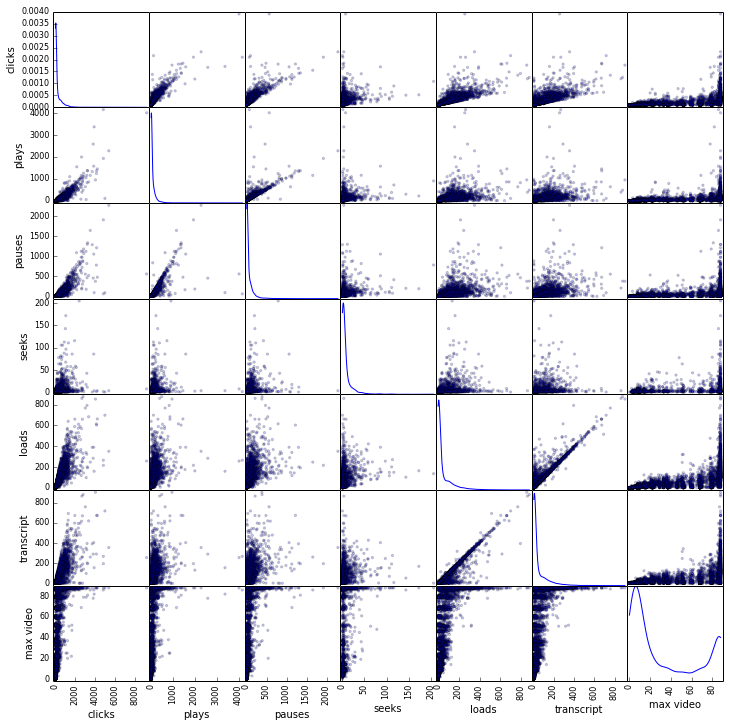

In [50]:
# Create a scatter matrix of the dataframe features
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

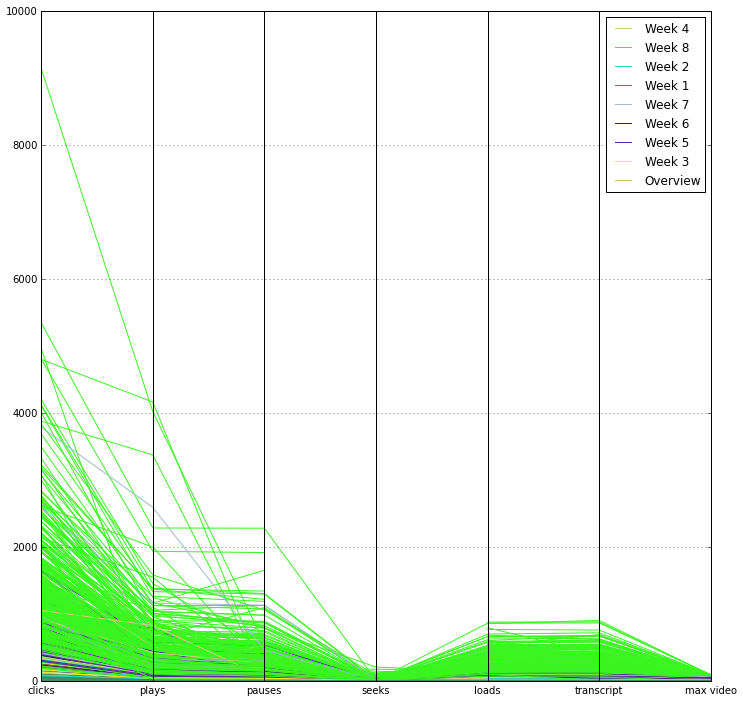

In [51]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'module')
plt.show()

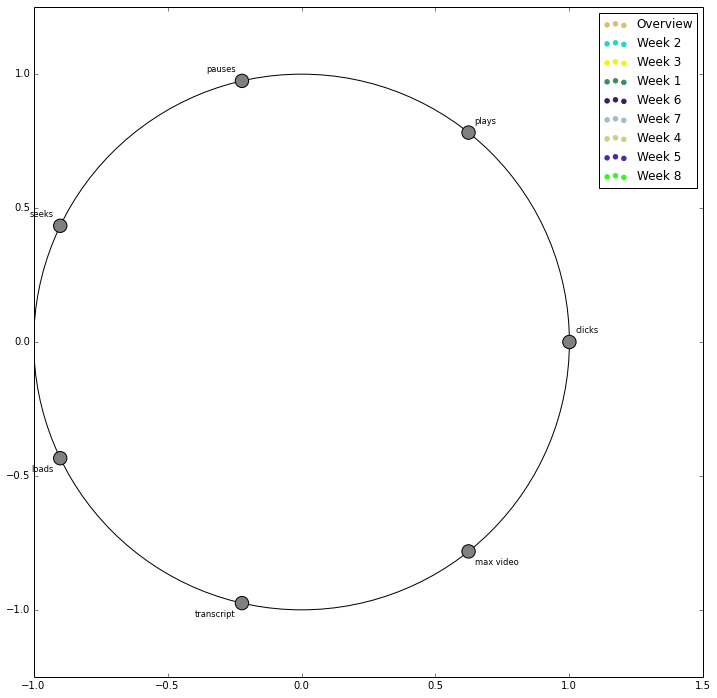

In [52]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'module')
plt.show()